---Decision Tree---
Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
MSE: 12.026316819800574, R2: 0.4134948014223786
Cross-Validation MSE: 5.214482180387433


C:\Users\Administrator\anaconda3\envs\pytorch\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


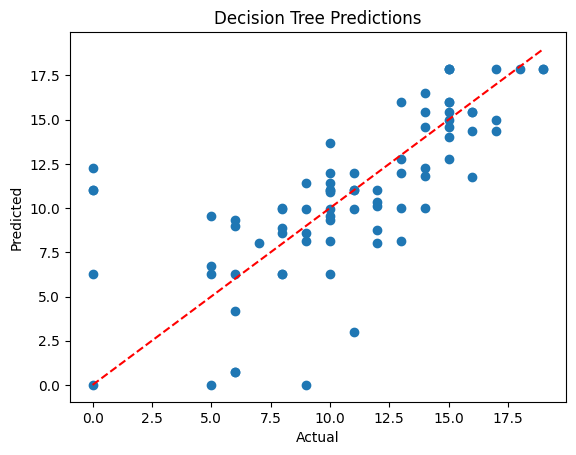

---Random Forest---


C:\Users\Administrator\anaconda3\envs\pytorch\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
MSE: 7.822997748481796, R2: 0.6184842860291714
Cross-Validation MSE: 3.2692974894563873


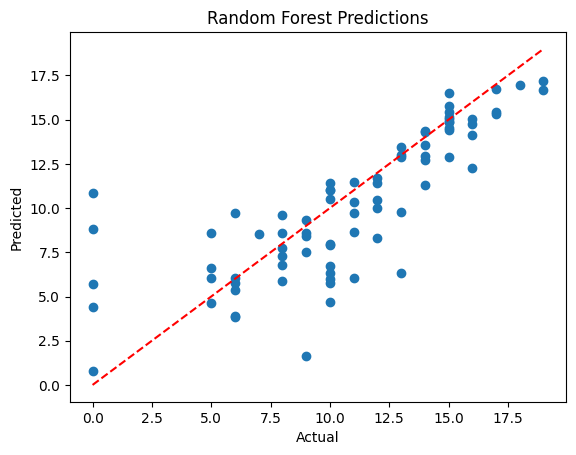

---Gradient Boosting---
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
MSE: 8.223088137287204, R2: 0.598972485662415
Cross-Validation MSE: 3.7407909695901402


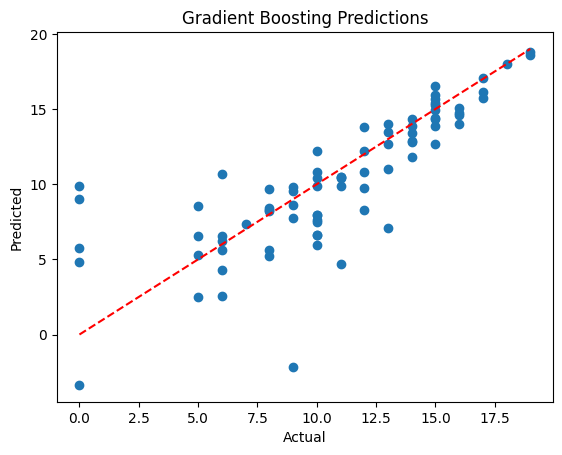

---SVR---
Best Parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}
MSE: 4.57168924526542, R2: 0.7770456617095811
Cross-Validation MSE: 4.044472714698313


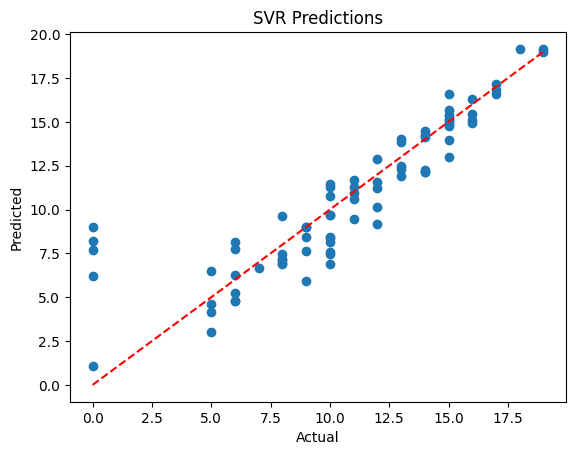

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('student-mat.csv', delimiter=';')

# 选择特征和目标变量
features = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
X = data[features]
y = data['G3']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建用于降维和标准化的管道
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

# 对训练和测试数据进行转换
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# 创建模型列表
models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVR', SVR())
]

# 定义超参数网格
param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7, 10]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['linear', 'rbf']
    }
}

# 训练和评估模型
for name, model in models:
    print(f'---{name}---')
    # 超参数调优
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # 最优模型
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # 性能评估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'MSE: {mse}, R2: {r2}')
    
    # 交叉验证评分
    scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f'Cross-Validation MSE: {-scores.mean()}')
    
    # 可视化预测结果
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.show()


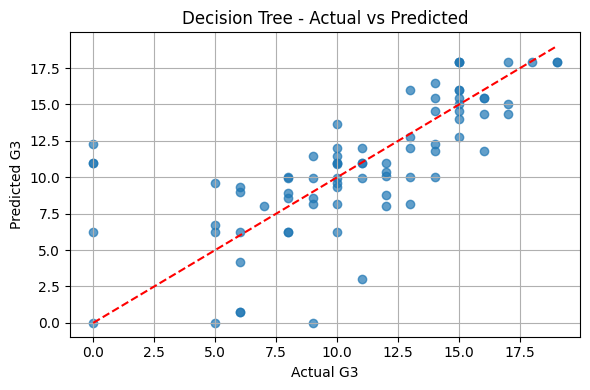

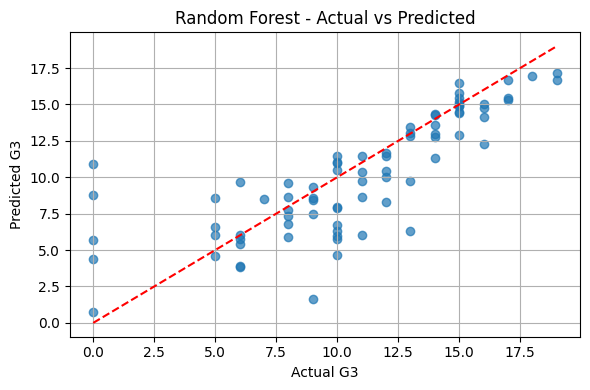

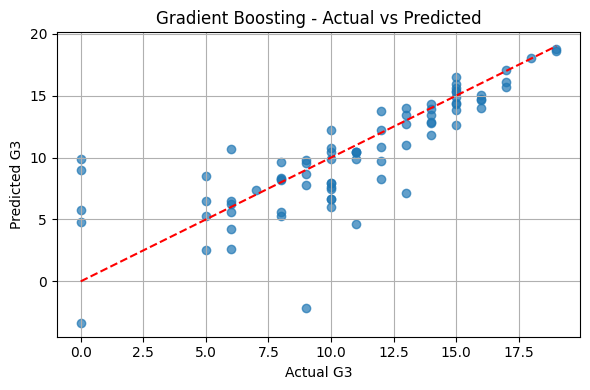

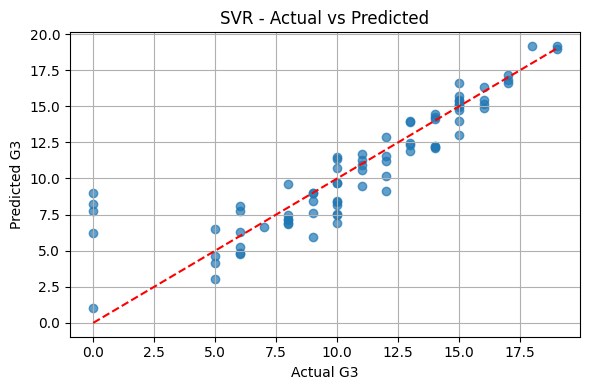

In [2]:
# 需要先保存每个模型的名称和预测值
model_preds = []

for name, model in models:
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    model_preds.append((name, y_test, y_pred))

# 可视化每个模型的实际值 vs 预测值
for name, y_true, y_pred in model_preds:
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.xlabel('Actual G3')
    plt.ylabel('Predicted G3')
    plt.title(f'{name} - Actual vs Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


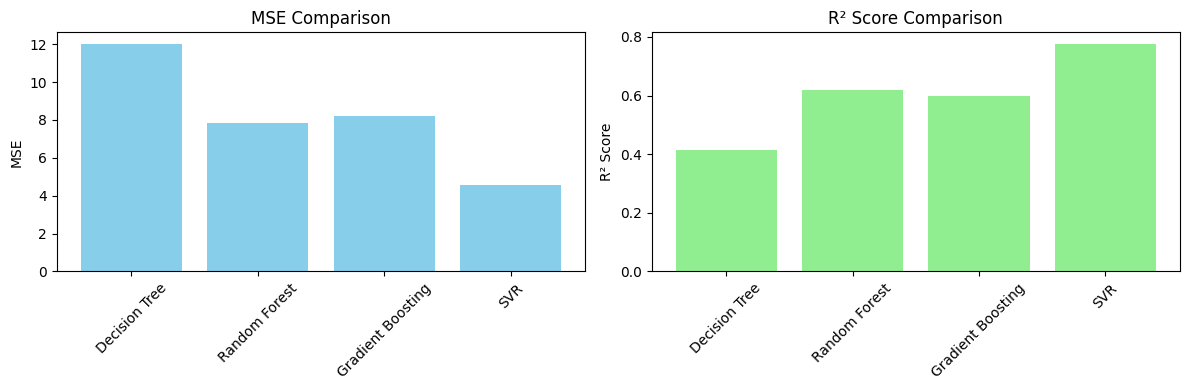

In [3]:
# 汇总模型表现结果
mse_scores = []
r2_scores = []

for name, y_true, y_pred in model_preds:
    mse_scores.append(mean_squared_error(y_true, y_pred))
    r2_scores.append(r2_score(y_true, y_pred))

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# MSE
axes[0].bar(models_names := [name for name, _, _ in model_preds], mse_scores, color='skyblue')
axes[0].set_title('MSE Comparison')
axes[0].set_ylabel('MSE')
axes[0].tick_params(axis='x', rotation=45)

# R2
axes[1].bar(models_names, r2_scores, color='lightgreen')
axes[1].set_title('R² Score Comparison')
axes[1].set_ylabel('R² Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


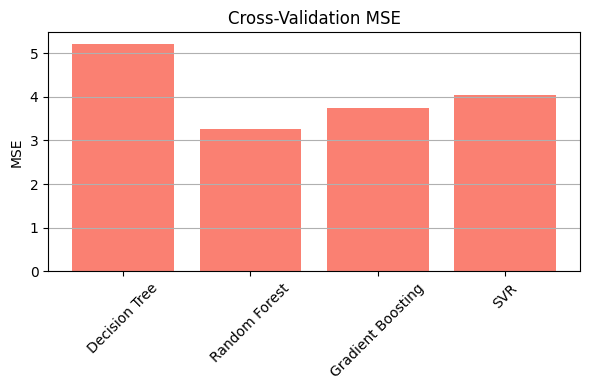

In [4]:
# 显示交叉验证得分（Neg MSE）
cv_scores_dict = {}

for name, model in models:
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores_dict[name] = -scores.mean()

# 可视化
plt.figure(figsize=(6, 4))
plt.bar(cv_scores_dict.keys(), cv_scores_dict.values(), color='salmon')
plt.title('Cross-Validation MSE')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


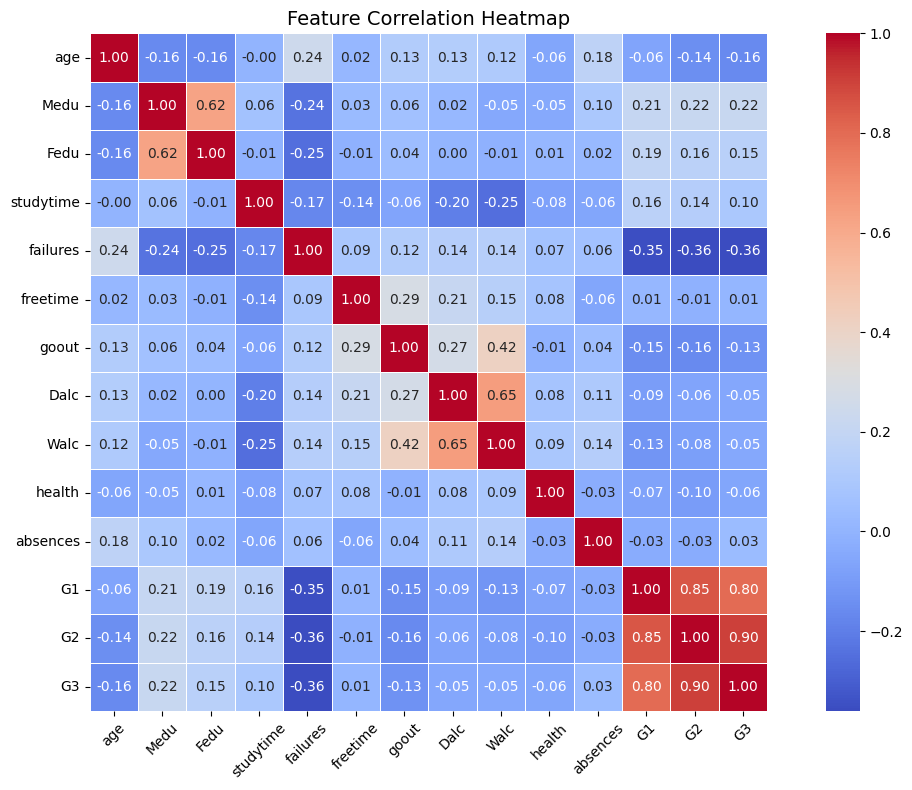

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选定用于模型训练的特征 + G3
features_to_plot = features + ['G3']
corr_matrix = data[features_to_plot].corr()

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [7]:
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred, model_name='Model'):
    plt.figure(figsize=(10, 5))

    # 散点图：实际 vs 预测
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.7, color='dodgerblue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual G3')
    plt.ylabel('Predicted G3')
    plt.title(f'{model_name} - Actual vs Predicted')

    # 折线图：按顺序对比
    plt.subplot(1, 2, 2)
    plt.plot(y_test.values, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.xlabel('Sample Index')
    plt.ylabel('G3')
    plt.title(f'{model_name} - Prediction Trend')
    plt.legend()

    plt.tight_layout()
    plt.show()


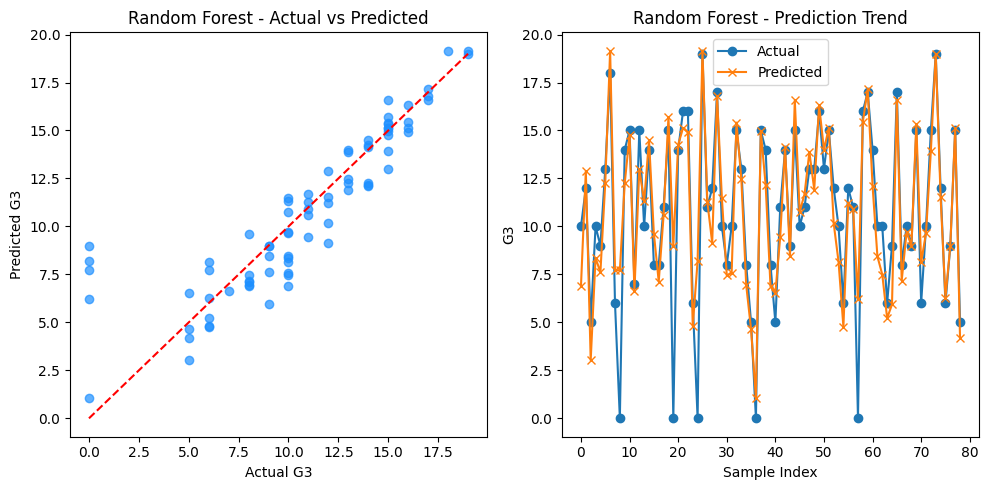

In [8]:
plot_predictions(y_test, y_pred, model_name='Random Forest')
